## Model evaluation metrices

In [80]:
# load libs
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [81]:
X, y = make_classification()

In [82]:
logit = LogisticRegression()

### accuracy
`
acc = (TP+TN)/(TP+FP+TN+FP)
`

In [83]:
acc = cross_val_score(logit, X, y, scoring='accuracy').mean()
acc

0.8099999999999999

### Precision
`
p = TP/(TP+FP)
`

In [84]:
p = cross_val_score(logit, X, y, scoring='precision').mean()
p

0.819191919191919

### recall
`
r = TP/(TP+FN)
`

In [85]:
r = cross_val_score(logit, X, y, scoring='recall').mean()
r

0.8

### F1-score
`
f1 = HM of p and r
   = (2xpxr)/(p+r)
`

In [86]:
f1 = (2*p*r)/(p+r)
f1

0.8094822208359326

In [87]:
cross_val_score(logit, X, y, scoring='f1').mean()

0.8082706766917294

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
model = logit.fit(X_train, y_train)
y_predicted = model.predict(X_test)

### classification report

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.60      0.75      0.67         8

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
weighted avg       0.72      0.70      0.70        20



### confusion matrix

In [90]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_predicted)
c_matrix

array([[8, 4],
       [2, 6]])

### heat map

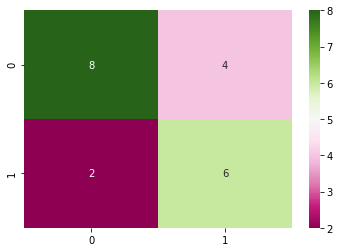

In [91]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(c_matrix)
sns.heatmap(df, annot=True, cmap='PiYG')
plt.show()

### ROC and AUC
`Adapted from: ` [here](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

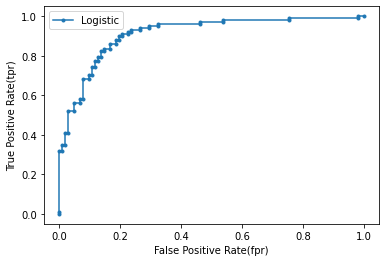

0.9105642256902761

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

# create fresh data
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate(fpr)')
plt.ylabel('True Positive Rate(tpr)')
plt.legend()
plt.show()
auc

## Hyperparameter Tuning & Best Model Selection

In [93]:
# CASE | range of hyperparameters are given

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import linear_model, datasets
import numpy as np

iris = datasets.load_iris()
features, target = iris.data, iris.target

logit = linear_model.LogisticRegression()

# hyperparameters
penalty = ['l1', 'l2']
C = np.logspace(0,4,10)
hyperparams = dict(penalty=penalty, C=C)

In [94]:
gridsearch = GridSearchCV(logit, hyperparams)
best_model = gridsearch.fit(features, target)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partit

In [95]:
best_model.best_estimator_

LogisticRegression(C=7.742636826811269, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
# computationally cheaper
import warnings
warnings.filterwarnings('ignore')
randomizedsearch = RandomizedSearchCV(logit, hyperparams)
best_model = randomizedsearch.fit(features, target)

In [97]:
best_model.best_estimator_

LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# CASE | multiple models, choose best one

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [99]:
search_space = [
                {
                    'classifier' : [linear_model.LogisticRegression()],
                 'classifier__penalty' : ['l1','l2'],
                 'classifier__C' : np.logspace(0,4,10)
                },
                {
                    'classifier' : [RandomForestClassifier()],
                 'classifier__n_estimators' : [10,100,1000],
                 'classifier__max_features' : [1,2,3]
                }
]
pipe = Pipeline(
    [
     (
         "classifier", RandomForestClassifier()
     )
    ]
)

# parallel computing on cores with -1 value for n_jobs
gridsearch = GridSearchCV(pipe, search_space, n_jobs=-1, verbose=1)
best_model = gridsearch.fit(features, target)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   20.9s finished


In [100]:
best_model.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=7.742636826811269, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [101]:
cross_val_score(gridsearch, features, target).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   20.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   20.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=-1)]: Done 145 out of 145 | elapsed:   20.9s finished


0.9800000000000001

$BY Gaurav Kabra$